In [350]:
import pandas as pd
resourceDf = pd.read_json("../data/resource.json") 
applicationDf = pd.read_json("../data/application.json")
paDf = pd.read_json("../data/productApplication.json")
serverDf = pd.read_json("../data/server.json")

In [351]:
total_resource_count = resourceDf.shape[0]
total_server_count =serverDf.shape[0]

serverResourceDf = resourceDf[
    resourceDf["type"].isin(['server','legacy-server','legacy-physical-server'])]
serverResourceDf.shape

(133373, 10)

In [352]:
import json
defaultPA = json.loads(paDf[paDf["name"]=='default'].to_json())
default_pa_id = defaultPA['_id']['0']['$oid']
print(default_pa_id)

61d3cd987d7ab1f2dc6bab0d


In [353]:
pd.set_option('mode.chained_assignment',  None) 

applicationDf["parentGroup"] = applicationDf["parentGroup"].apply(lambda x : x['_id']['$oid'])
applicationDf["_id"] = applicationDf["_id"].apply(lambda x : x['$oid'])
serverResourceDf["parentGroups"]= serverResourceDf["parentGroups"].apply(lambda x : x[0]['_id']['$oid'])

In [354]:
lookupServerApplicationDf = pd.merge(left = serverResourceDf , right = applicationDf, left_on='parentGroups', right_on='_id', how = "left" ,suffixes=["_resource","_application"])

In [355]:
non_default_pa_server = lookupServerApplicationDf[lookupServerApplicationDf["parentGroup"] != default_pa_id]
non_default_pa_server.dropna(axis=0,how='any',subset=["parentGroup","parentGroups"],inplace = True)
non_default_pa_server_count= non_default_pa_server.shape[0]

([<matplotlib.patches.Wedge at 0x457f71130>,
 [Text(0.7891340372758728, 0.7663337857700662, 'server type resource'),
  Text(-0.7891340372758726, -0.7663337857700663, 'total resource')],
 [Text(0.4304367476050215, 0.4180002467836724, '24.53%'),
  Text(-0.43043674760502143, -0.4180002467836725, '75.47%')])

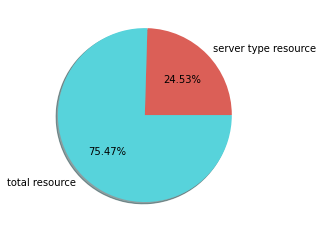

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

values = [non_default_pa_server_count, total_resource_count-non_default_pa_server_count]
labels = ["server type resource", "total resource"]
colors = sns.color_palette('hls',len(labels))

plt.pie(values,labels=labels, autopct='%.3f%%', colors = colors,shadow=True)

([<matplotlib.patches.Wedge at 0x454fbf850>,
 [Text(0.7886596230005808, 0.7668220126265168, 'server type resource'),
  Text(-0.7886596230005808, -0.7668220126265168, 'total server')],
 [Text(0.43017797618213494, 0.41826655234173643, '24.55%'),
  Text(-0.43017797618213494, -0.41826655234173643, '75.45%')])

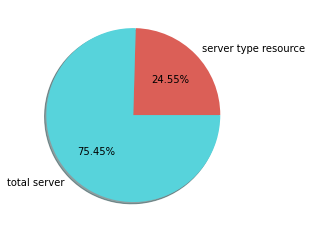

In [360]:
values2 = [non_default_pa_server_count, total_server_count-non_default_pa_server_count]
labels2 = ["server type resource", "total server"]
colors2 = sns.color_palette('hls',len(labels))
plt.pie(values2,labels=labels2, autopct='%.3f%%', colors = colors2,shadow=True)

In [362]:
# TODO - subplot, 갯수 나타내기, 전체에 대한 비율

.
